In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from re import sub
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,RobustScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


import os

In [ ]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')

In [3]:
train_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [4]:
test_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [7]:
#first 2 useless features removed
test_df.drop(columns=[col for col in ['id','Unnamed: 0'] if col in test_df.columns], inplace=True)
train_df.drop(columns=[col for col in ['id','Unnamed: 0'] if col in train_df.columns], inplace=True)

In [8]:

df = train_df.copy()

# Complete missing values in Arrival Delay
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(
    df['Arrival Delay in Minutes'].median()
)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
target_col = 'satisfaction'

y = df[target_col].copy()
X = df.drop(columns=[target_col])

In [11]:
cat_cols = [c for c in ['Gender','Customer Type','Type of Travel','Class'] if c in X.columns]

In [1]:

X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("x encoded: ", X_enc)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_enc)
num_vars=train_df[["Age", "Flight_Distance", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]].copy()

num_scaled=pd.DataFrame(X_scaled,columns=num_vars.columns)
num_scaled.head()



NameError: name 'pd' is not defined

In [13]:
pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_scaled)

explained_each = pca_full.explained_variance_ratio_
explained_cum  = np.cumsum(explained_each)
n95 = int(np.argmax(explained_cum >= 0.95) + 1)

print(f"Explained variance by the first 2 components: "
      f"{explained_each[0]*100:.2f}% + {explained_each[1]*100:.2f}% = {(explained_each[0]+explained_each[1])*100:.2f}%")
print(f"Minimum number of components to retain ≥95% variance: {n95} out of {X_enc.shape[1]} features")


Explained variance by the first 2 components: 17.66% + 10.31% = 27.97%
Minimum number of components to retain ≥95% variance: 18 out of 23 features


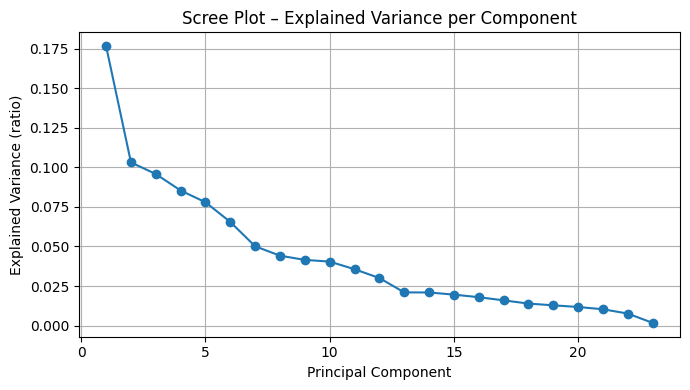

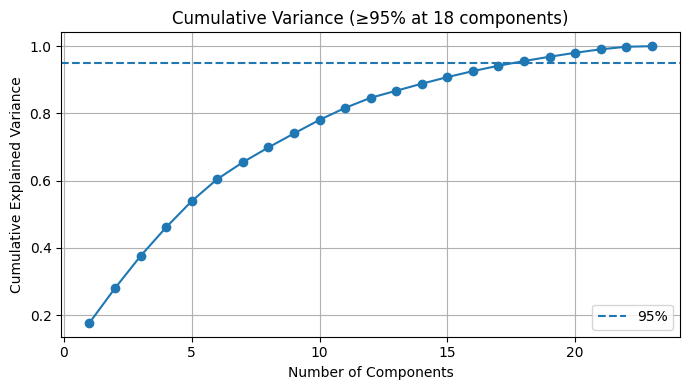

In [14]:
plt.figure(figsize=(7,4))
plt.plot(np.arange(1, len(explained_each)+1), explained_each, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (ratio)')
plt.title('Scree Plot – Explained Variance per Component')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(np.arange(1, len(explained_cum)+1), explained_cum, marker='o')
plt.axhline(0.95, linestyle='--', label='95%')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title(f'Cumulative Variance (≥95% at {n95} components)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


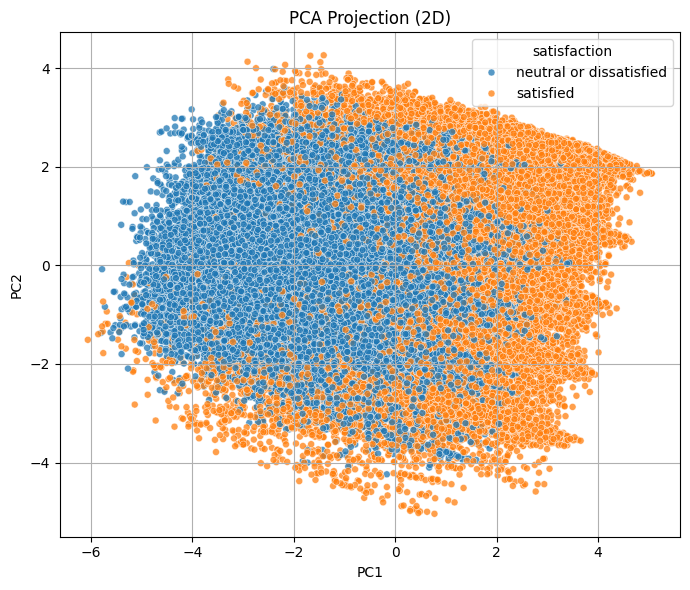

In [15]:
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=y, s=25, alpha=0.75)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection (2D)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
loadings = pd.DataFrame(
    pca2.components_.T,
    index=X_enc.columns,
    columns=['PC1','PC2']
)

topN = 10
top_pc1 = loadings.reindex(loadings['PC1'].abs().sort_values(ascending=False).index).head(topN)
top_pc2 = loadings.reindex(loadings['PC2'].abs().sort_values(ascending=False).index).head(topN)

print("\nTop variables by loading on PC1:")
display(top_pc1)

print("\nTop variables by loading on PC2:")
display(top_pc2)



Top variables by loading on PC1:


,PC1,PC2
Inflight entertainment,0.401765,-0.161009
Seat comfort,0.336766,-0.130582
Cleanliness,0.331964,-0.150041
Online boarding,0.295567,0.154206
Food and drink,0.282182,-0.131599
On-board service,0.263870,-0.077493
Inflight service,0.241583,-0.074292
Baggage handling,0.238712,-0.067242
Leg room service,0.218988,-0.025861
Inflight wifi service,0.214601,0.451157



Top variables by loading on PC2:


,PC1,PC2
Ease of Online booking,0.157683,0.531953
Inflight wifi service,0.214601,0.451157
Departure/Arrival time convenient,0.076351,0.435987
Gate location,0.055768,0.430859
Inflight entertainment,0.401765,-0.161009
Online boarding,0.295567,0.154206
Cleanliness,0.331964,-0.150041
Food and drink,0.282182,-0.131599
Seat comfort,0.336766,-0.130582
On-board service,0.263870,-0.077493
